Group 1: Omer, Friedrich, Johannes </br></br>
Thema: Wie berechnet man Ausreißer?

In [152]:
import pandas as pd
import seaborn as sns
sns.set_palette(['#EC6602'])
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns

In [153]:
df = pd.read_csv('../data/student_sleep_patterns.csv')
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,503,41,Male,3rd Year,10.9,14.6,1.3,0,86,1,7.57,17.12,10.01,9.22
503,504,42,Male,3rd Year,11.9,15.6,1.4,0,86,1,7.58,18.12,11.01,9.23
504,505,65,Male,3rd Year,13.9,17.6,1.6,0,86,1,7.60,20.12,13.01,9.25
505,506,31,Male,3rd Year,15.9,19.6,1.8,0,86,1,7.62,22.12,15.01,9.27


In [154]:
df.rename(columns={'Age': 'age'}, inplace=True)

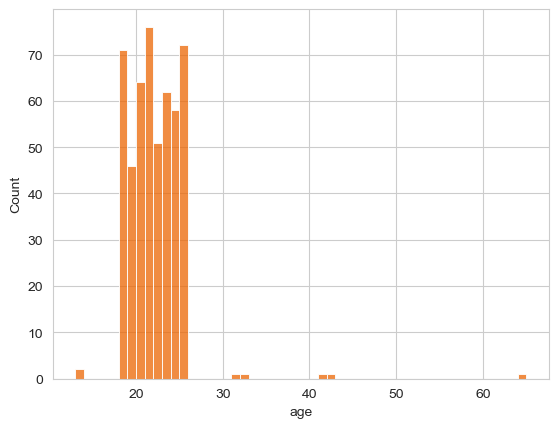

In [155]:
sns.histplot(data=df, x='age')
plt.show();

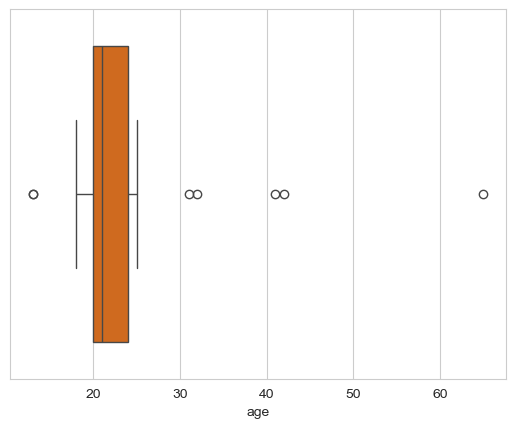

In [156]:
sns.boxplot(data=df, x='age')
plt.show();

In [157]:
q1 = df.age.quantile(0.25) #erstes Quartil
print(f"erstes Quartil: {q1}")

erstes Quartil: 20.0


In [158]:
q3 = df.age.quantile(0.75) #drittes Quartil
print(f"drittes Quartile: {q3}")

drittes Quartile: 24.0


In [159]:
iqr = q3 - q1 #Interquartileabstant
print(f"Interquarilabstand: {iqr}")

Interquarilabstand: 4.0


In [160]:
upper_bound = q3 + iqr * 1.5 #obere Grenze
lower_bound = q1 - iqr * 1.5 #untere Grenze
print(f"Untere Grenze: {lower_bound}")
print(f"Obere Grenze: {upper_bound}")

Untere Grenze: 14.0
Obere Grenze: 30.0


In [161]:
outliers = (df.age > upper_bound) | (df.age < lower_bound) #Ausreißer (außerhalb des Bereichs)

In [162]:
df[outliers] #der Datensatz mit allen Ausreißern

,Student_ID,age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
500,501,13,Male,3rd Year,8.9,12.6,1.1,0,86,1,7.55,15.12,8.01,9.20
501,502,13,Female,3rd Year,9.9,13.6,1.2,0,86,1,7.56,16.12,9.01,9.21
502,503,41,Male,3rd Year,10.9,14.6,1.3,0,86,1,7.57,17.12,10.01,9.22
503,504,42,Male,3rd Year,11.9,15.6,1.4,0,86,1,7.58,18.12,11.01,9.23
504,505,65,Male,3rd Year,13.9,17.6,1.6,0,86,1,7.60,20.12,13.01,9.25
505,506,31,Male,3rd Year,15.9,19.6,1.8,0,86,1,7.62,22.12,15.01,9.27
506,507,32,Male,3rd Year,16.9,20.6,1.9,0,86,1,7.63,23.12,16.01,9.28


In [163]:
df_filtered = df[~(outliers)] #der Datensatz ohne Ausreißer
df_filtered

,Student_ID,age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


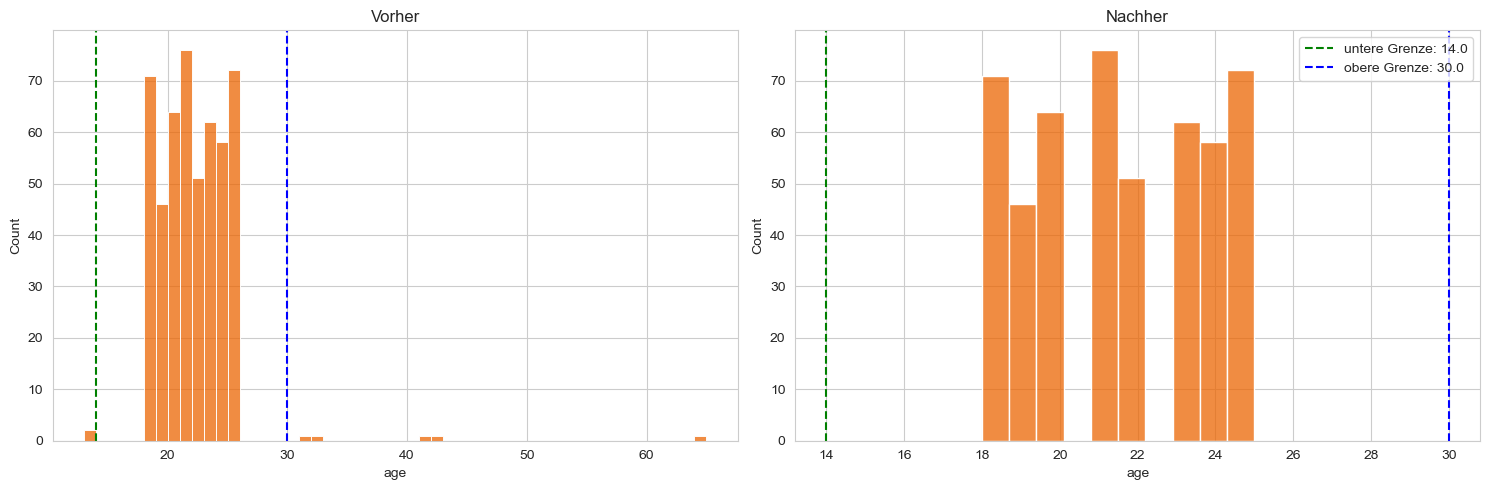

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x='age', ax=ax[0])
ax[0].set_title('Vorher')
ax[0].axvline(lower_bound, color='g', linestyle='--', label=f"untere Grenze: {lower_bound}")
ax[0].axvline(upper_bound, color='b', linestyle='--', label=f"obere Grenze: {upper_bound}")


sns.histplot(data=df_filtered, x='age', ax=ax[1])
ax[1].set_title('Nachher')
ax[1].axvline(lower_bound, color='g', linestyle='--', label=f"untere Grenze: {lower_bound}")
ax[1].axvline(upper_bound, color='b', linestyle='--', label=f"obere Grenze: {upper_bound}")


plt.tight_layout()
plt.legend()
plt.show();

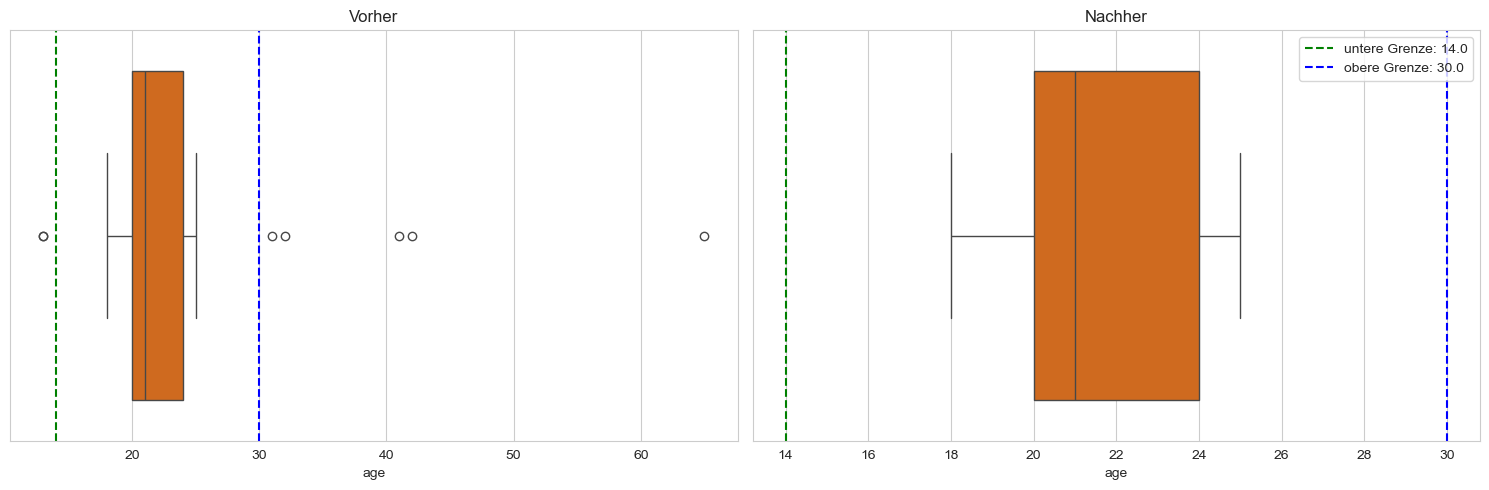

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='age', ax=ax[0])
ax[0].set_title('Vorher')
ax[0].axvline(lower_bound, color='g', linestyle='--', label=f"untere Grenze: {lower_bound}")
ax[0].axvline(upper_bound, color='b', linestyle='--', label=f"obere Grenze: {upper_bound}")

sns.boxplot(data=df_filtered, x='age', ax=ax[1])
ax[1].set_title('Nachher')
ax[1].axvline(lower_bound, color='g', linestyle= '--', label=f"untere Grenze: {lower_bound}")
ax[1].axvline(upper_bound, color='b', linestyle='--', label=f"obere Grenze: {upper_bound}")

plt.tight_layout()
plt.legend()
plt.show();

In [166]:
df_filtered.age.describe()

count    500.00000
mean      21.53600
std        2.33315
min       18.00000
25%       20.00000
50%       21.00000
75%       24.00000
max       25.00000
Name: age, dtype: float64